In [1]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
dataframe1 = pd.read_excel("2206631 - Final Data excel .xlsx")

# Bisconti data set (2022)

## Interesting possible comparisons

*simple demographic comparisons*

Q10 vs Gender (Q1)  
Q10 vs Ethnicity (Q3)  
Q10 vs Q4 (Education)  
Q10 vs Q5a (Political views)  

*nuanced comparisons*
Q10 vs Q6r1: Q6r1: Affordable electricity - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r2: Reliable electricity - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r3: Clean air - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r4: Preservation of natural resources - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r5: Efficiency - How important to you are the following considerations for the way electricity is produced?
Q10 vs Q6r7: Economic growth - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r8: Job creation - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r9: Climate change solution - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r10: Resilience - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r11: Small footprint (less land use) - How important to you are the following considerations for the way electricity is produced?  

*since this is on a scale of important to not important, we need to flatten this structure to create a diagram of importance*

#### *We can use the Q7 version of these above questions to create a pie chart to show what Americans want the most in their energy*
Q7r1 vs Q7r2 vs Q7r3 vs Q7r4 vs Q7r5 vs Q7r6 vs Q7r7


*Glossary*
Q10 = Overall, do you strongly favor, somewhat favor, somewhat oppose, or strongly oppose the use of nuclear energy as one of the ways to provide electricity in the United States?'

In [3]:
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
df_csv = pd.read_csv("output_file.csv")
df_csv.columns

Index(['record: record: Record number', 'qtime: qtime: Total Interview Time',
       'Q1: Q1: Your gender.', 'Q2: Q2: Pull down to select your age.',
       'hAge1: hAge1: hidden', 'hAge2: hAge2: hidden',
       'Q3: Q3: Is your ethnicity…?',
       'Q4: Q4: What was the highest level of school you completed?',
       'Q5: Q5: Generally speaking, do you usually think of yourself as…?',
       'Q5a: Q5a: Are your political views…?',
       'Q5b: Q5b: For whom did you vote in the 2020 presidential election?',
       'Q6r1: Q6r1: Affordable electricity - How important to you are the following considerations for the way electricity is produced?',
       'Q6r2: Q6r2: Reliable electricity - How important to you are the following considerations for the way electricity is produced?',
       'Q6r3: Q6r3: Clean air - How important to you are the following considerations for the way electricity is produced?',
       'Q6r4: Q6r4: Preservation of natural resources - How important to you are the fol

In [3]:
def plot_bar_or_pie(column, title, pie_flag = True, bar_flag = False):
    import plotly.express as px
    my_dict = {} # dictionary to hold list of strings of approval
    
    df2 = dataframe1[[column, "Q10"]] # grabs subset of questions
    for idx, row in df2.iterrows():
        #print(idx, row["hAge1"], row["Q10"])
        if(row[column] not in my_dict): #checks if category (ie 18-34, 45-50, 50+) is in dictionary or not.
            my_dict[row[column]] = [row["Q10"]]
            #print([row["Q10"]])
            pass
        else:
            my_dict[row[column]].append(row["Q10"])

            
    for key, val in my_dict.items():
        print(key)
        #print(val)
        print('Strongly favor:', val.count('Strongly favor'))
        print('Somewhat favor:', val.count('Somewhat favor'))
        print('Somewhat oppose:', val.count('Somewhat oppose'))
        print('Strongly oppose:', val.count('Strongly oppose'))

        att_list = [val.count('Strongly favor'), val.count('Somewhat favor'), val.count('Somewhat oppose'), val.count('Strongly oppose')]
        att_list_types = ['Strongly favor', 'Somewhat favor', 'Somewhat oppose', 'Strongly oppose']
        fig = px.bar(x = att_list_types, y = att_list, title=title.format(key=key), template='plotly_dark').update_layout(
        xaxis_title="Attitudes", yaxis_title="Number of responses"
    )
        if bar_flag:
            fig.show()

        fig = px.pie(values = att_list, names = att_list_types, title=title.format(key=key), template='plotly_dark')
        if pie_flag:
            fig.show()

In [4]:
def plot_whole_population(column, title, pie_flag = True, bar_flag = False):
    import plotly.express as px
    my_dict = {} # dictionary to hold list of strings of approval
    
    df_col_list = dataframe1[column].tolist() # grabs subset of questions
    
    att_list_types = list(set(df_col_list))
    att_list = [val.count('Strongly favor'), val.count('Somewhat favor'), val.count('Somewhat oppose'), val.count('Strongly oppose')]
    
plot_whole_population("Q6r2", "Test")

NameError: name 'val' is not defined

18-34
Strongly favor: 96
Somewhat favor: 131
Somewhat oppose: 42
Strongly oppose: 13


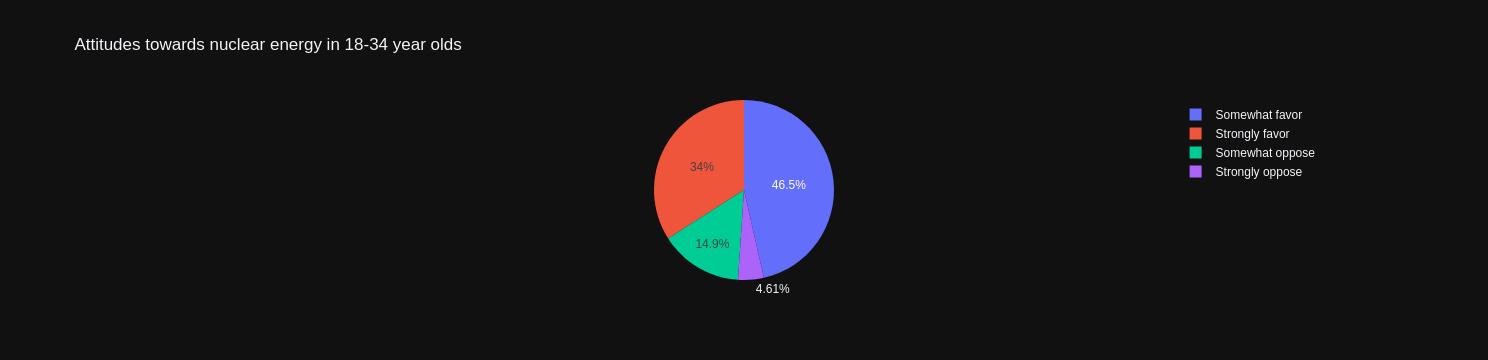

35-49
Strongly favor: 77
Somewhat favor: 133
Somewhat oppose: 42
Strongly oppose: 20


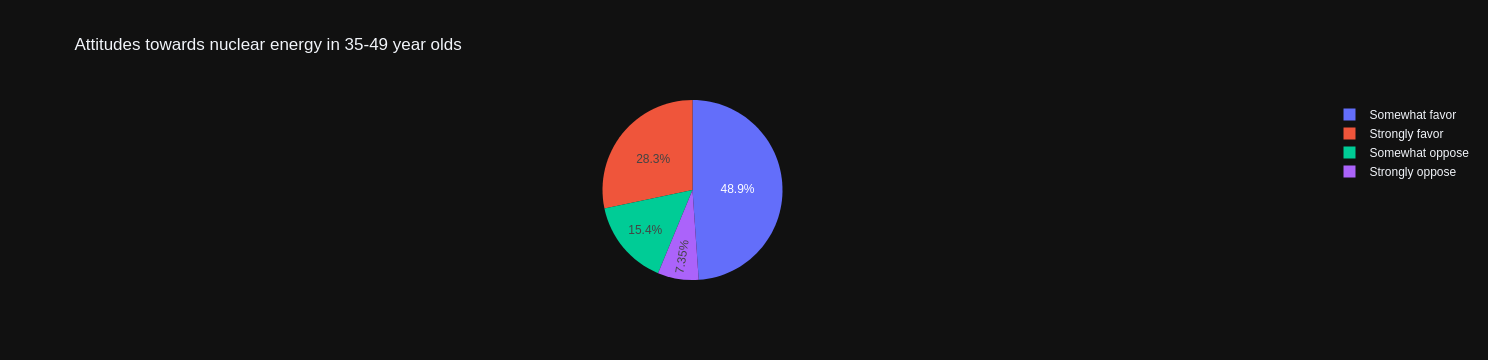

50+
Strongly favor: 159
Somewhat favor: 173
Somewhat oppose: 75
Strongly oppose: 39


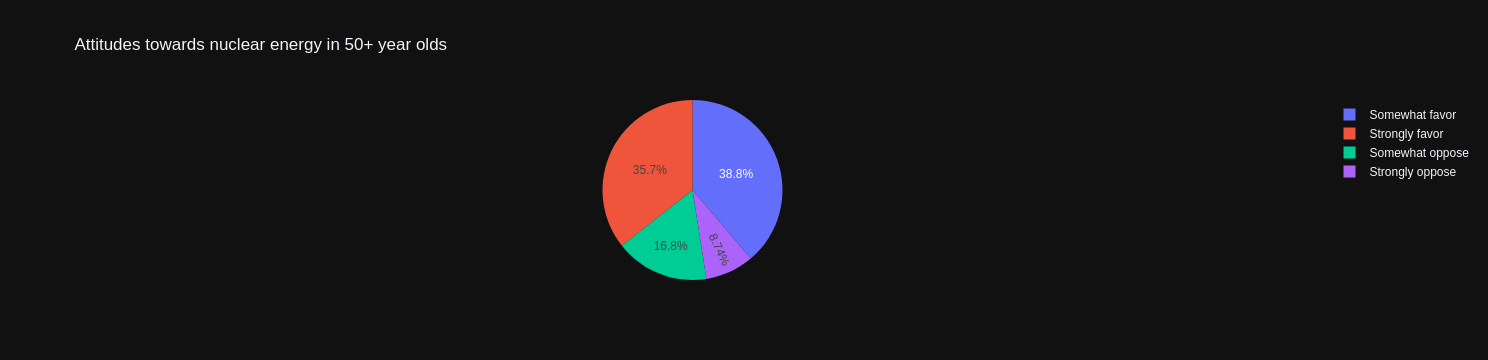

In [5]:
plot_bar_or_pie("hAge1", "Attitudes towards nuclear energy in {key} year olds")

Gen Z (<26)
Strongly favor: 30
Somewhat favor: 42
Somewhat oppose: 15
Strongly oppose: 4


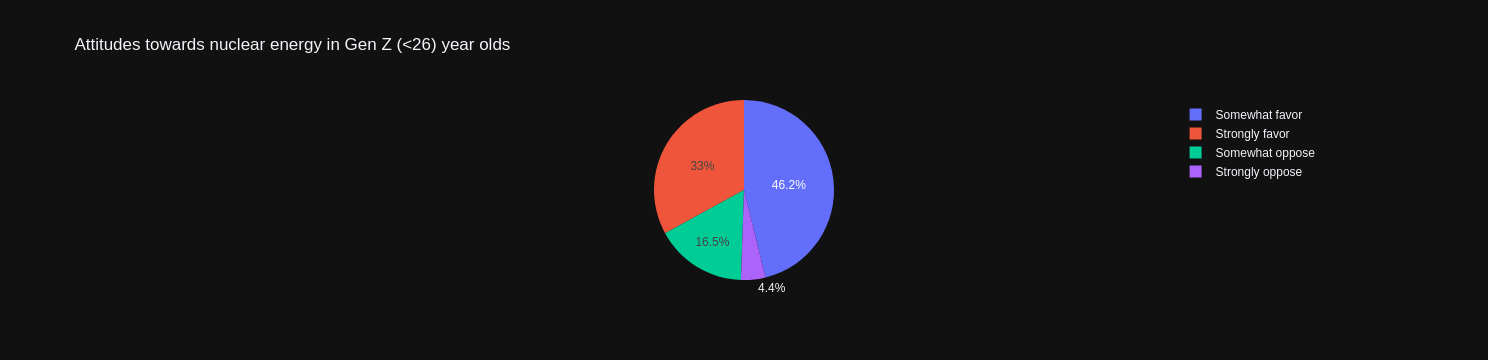

Millennial (26-41)
Strongly favor: 111
Somewhat favor: 163
Somewhat oppose: 53
Strongly oppose: 21


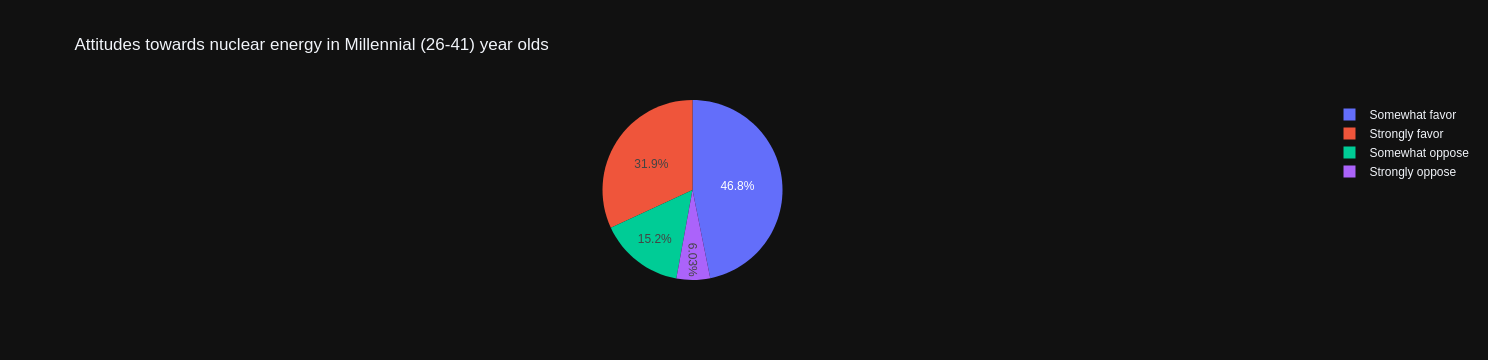

Gen X (42-57)
Strongly favor: 81
Somewhat favor: 122
Somewhat oppose: 49
Strongly oppose: 24


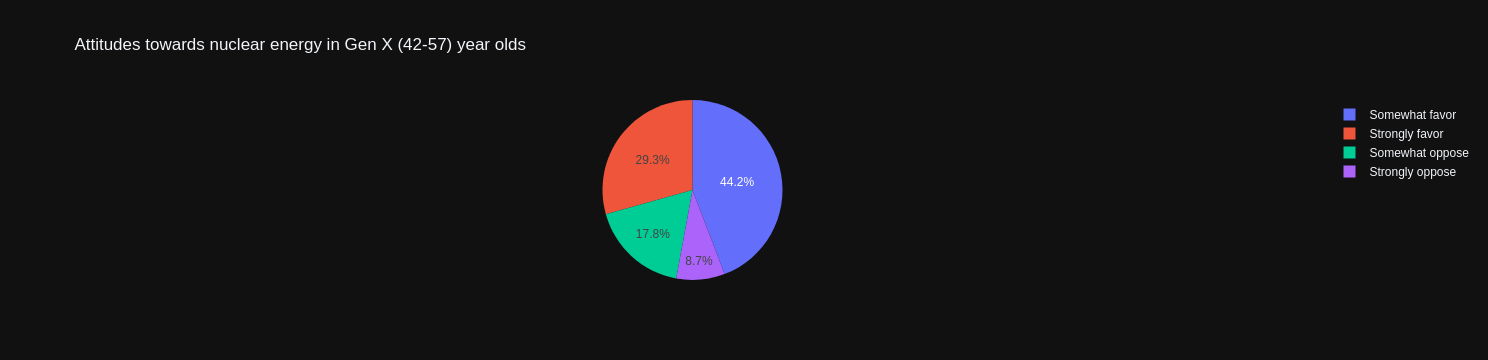

Boomers (58-76)
Strongly favor: 94
Somewhat favor: 106
Somewhat oppose: 41
Strongly oppose: 21


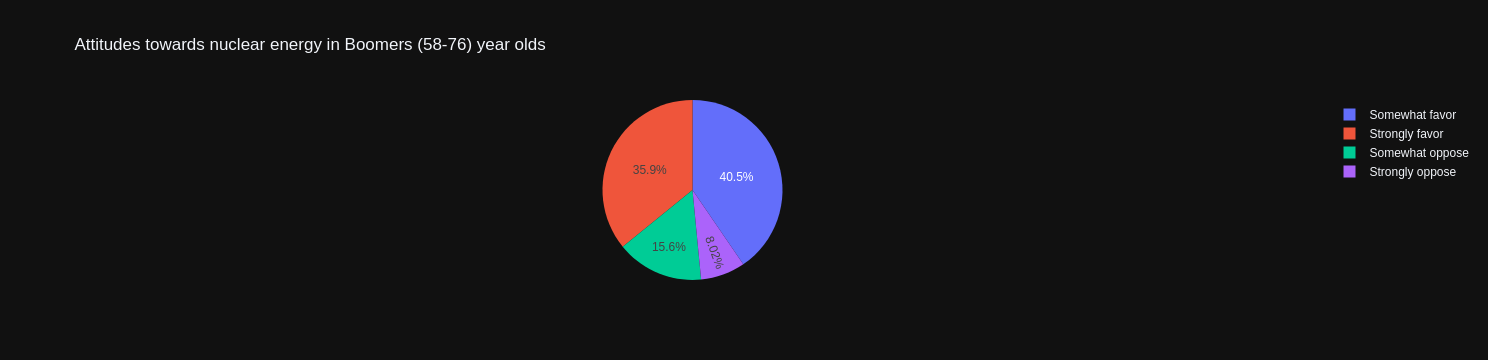

Silent generation (>76)
Strongly favor: 16
Somewhat favor: 4
Somewhat oppose: 1
Strongly oppose: 2


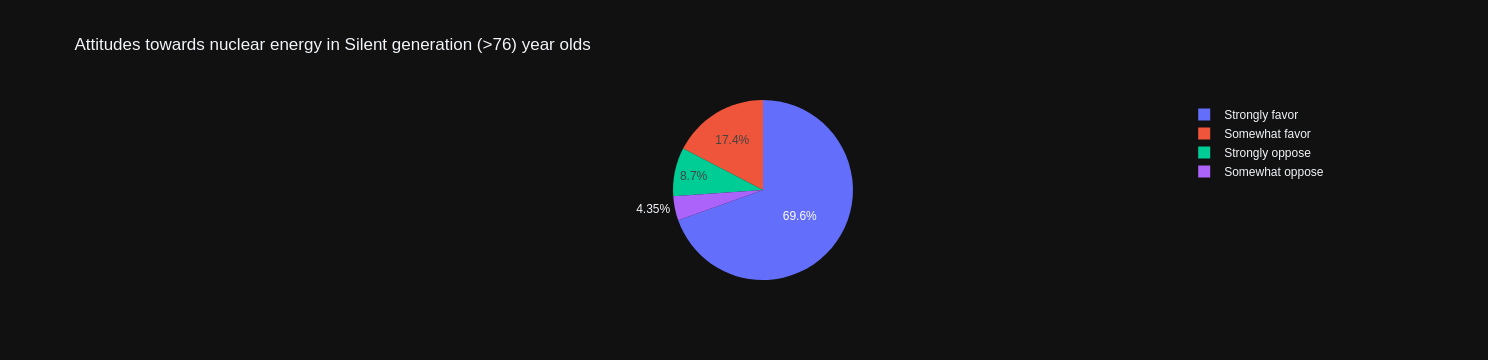

In [6]:
plot_bar_or_pie("hAge2", "Attitudes towards nuclear energy in {key} year olds")

Graduated college, bachelor's degree
Strongly favor: 161
Somewhat favor: 173
Somewhat oppose: 68
Strongly oppose: 35


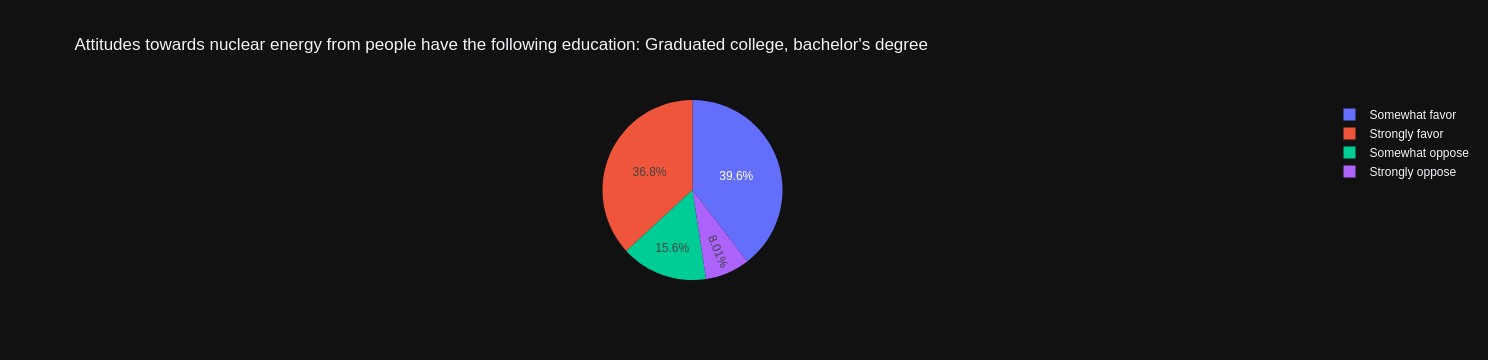

Some high school or less
Strongly favor: 4
Somewhat favor: 11
Somewhat oppose: 7
Strongly oppose: 2


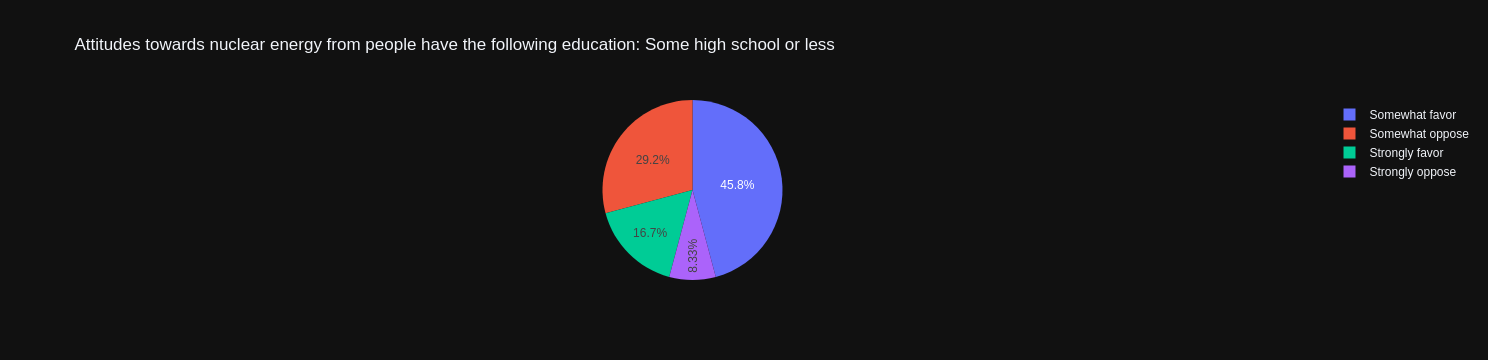

Graduate school
Strongly favor: 15
Somewhat favor: 19
Somewhat oppose: 6
Strongly oppose: 3


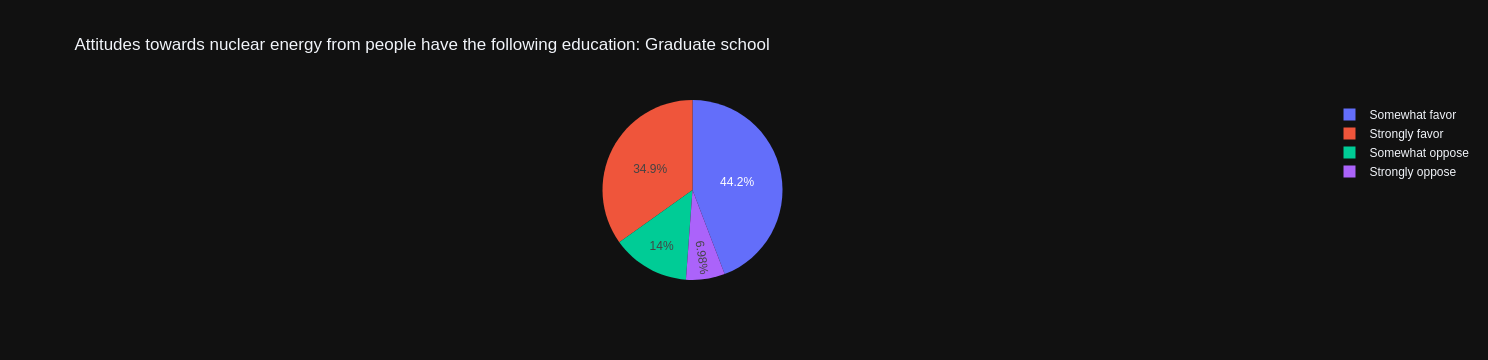

Graduated high school
Strongly favor: 57
Somewhat favor: 97
Somewhat oppose: 33
Strongly oppose: 18


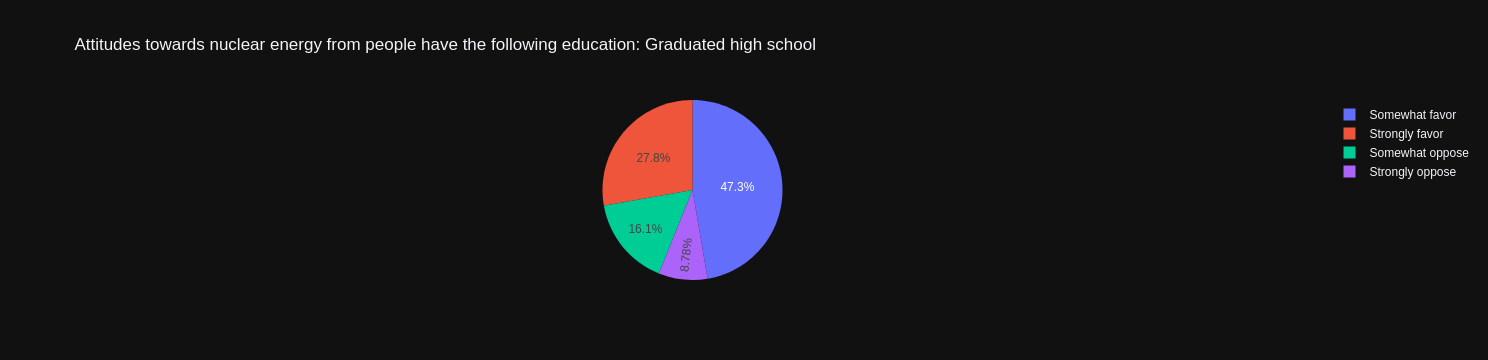

Some college, associate degree
Strongly favor: 85
Somewhat favor: 123
Somewhat oppose: 39
Strongly oppose: 13


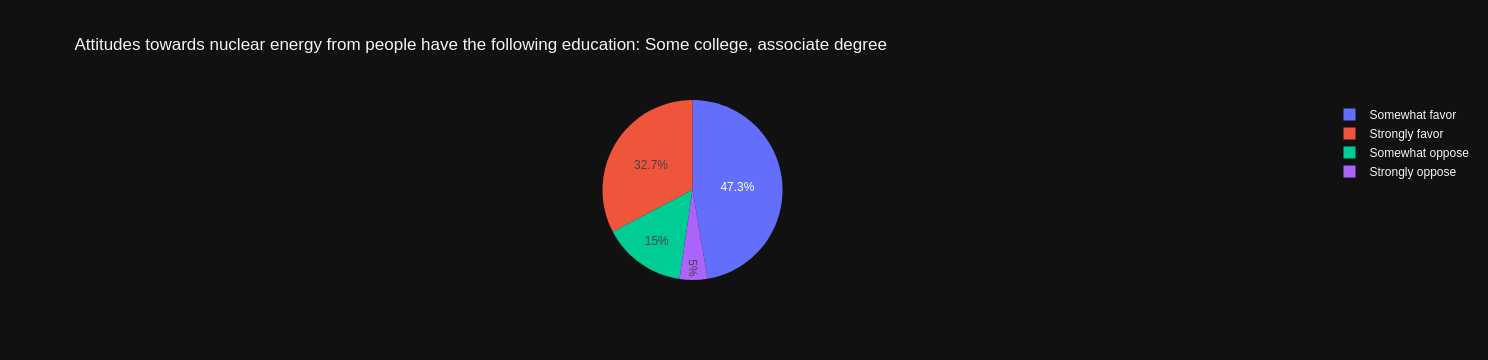

Technical/vocational school
Strongly favor: 10
Somewhat favor: 14
Somewhat oppose: 6
Strongly oppose: 1


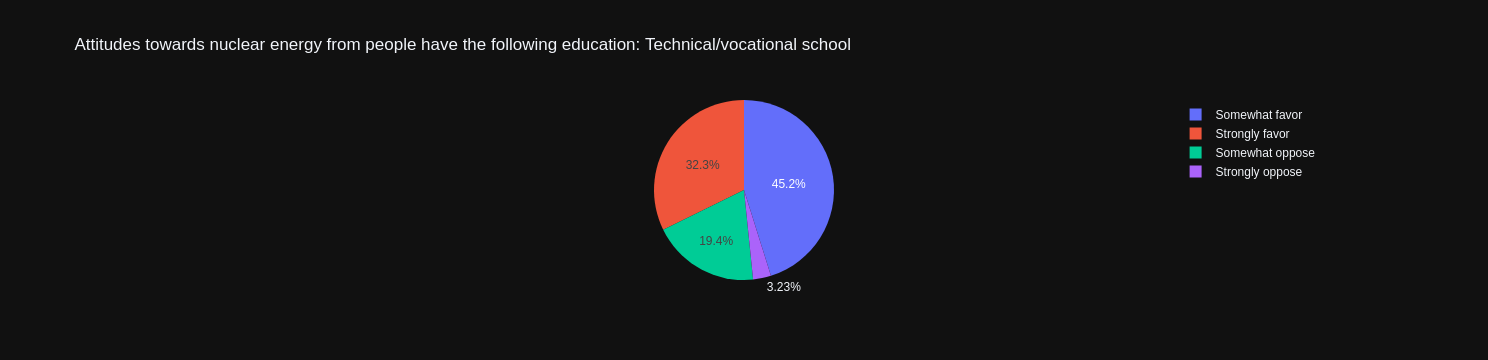

In [7]:
plot_bar_or_pie("Q4", "Attitudes towards nuclear energy from people have the following education: {key}")

Asian
Strongly favor: 20
Somewhat favor: 15
Somewhat oppose: 6
Strongly oppose: 1


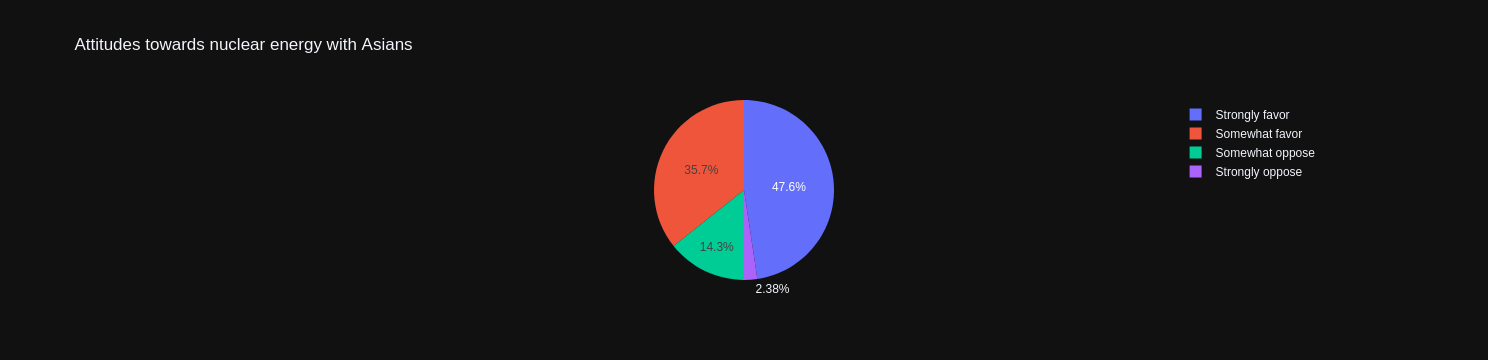

African American or Black
Strongly favor: 52
Somewhat favor: 61
Somewhat oppose: 25
Strongly oppose: 6


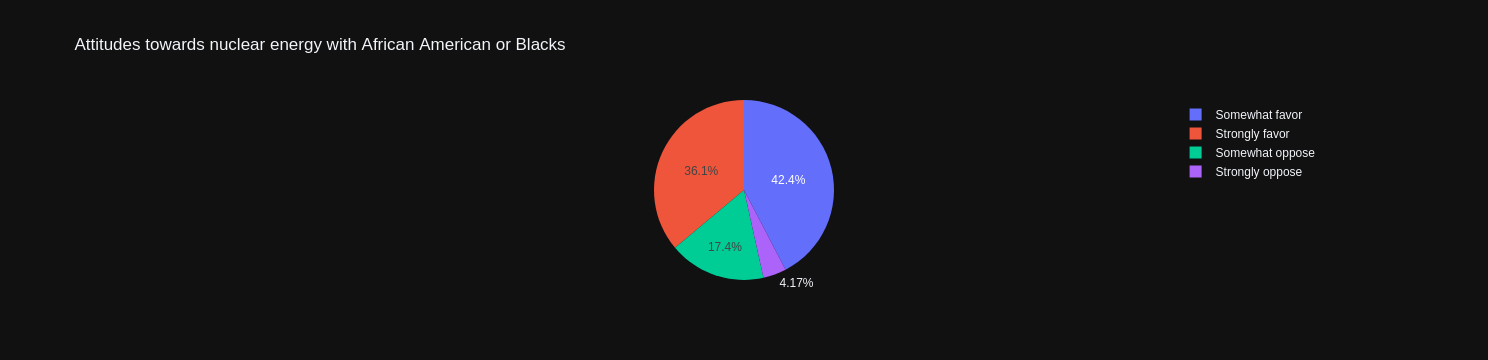

Caucasian or White
Strongly favor: 231
Somewhat favor: 307
Somewhat oppose: 116
Strongly oppose: 57


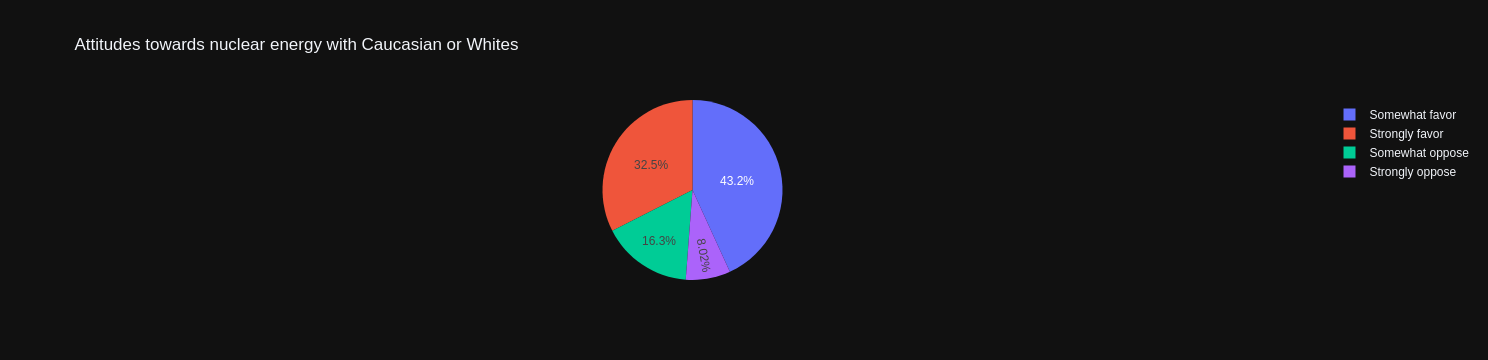

Native American or Indigenous
Strongly favor: 1
Somewhat favor: 7
Somewhat oppose: 0
Strongly oppose: 0


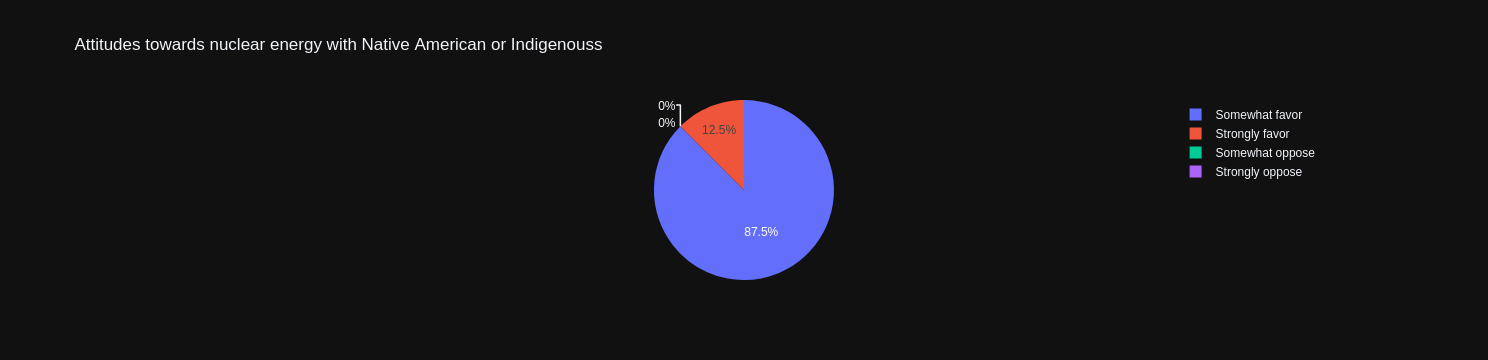

Hispanic, Latino, or Latinx
Strongly favor: 24
Somewhat favor: 40
Somewhat oppose: 6
Strongly oppose: 6


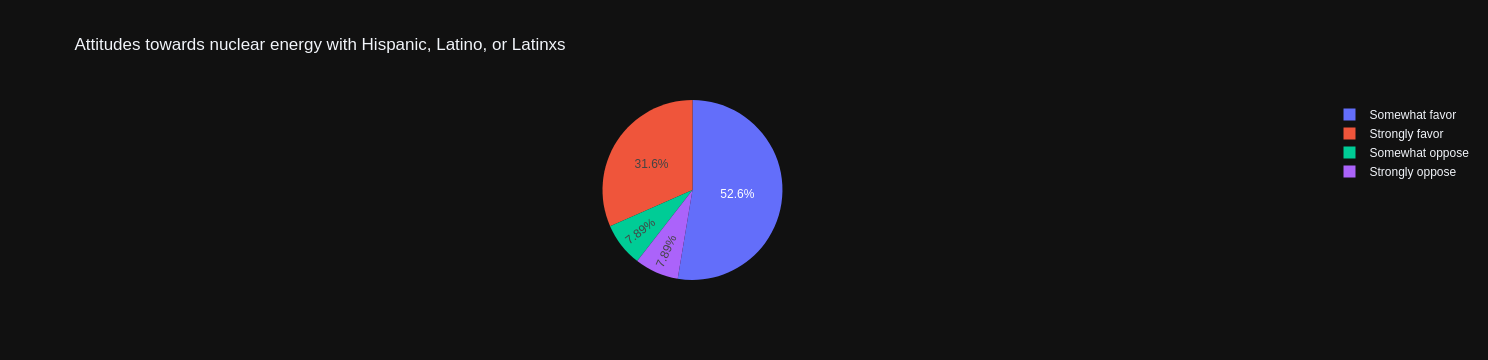

Mixed Race
Strongly favor: 3
Somewhat favor: 6
Somewhat oppose: 5
Strongly oppose: 1


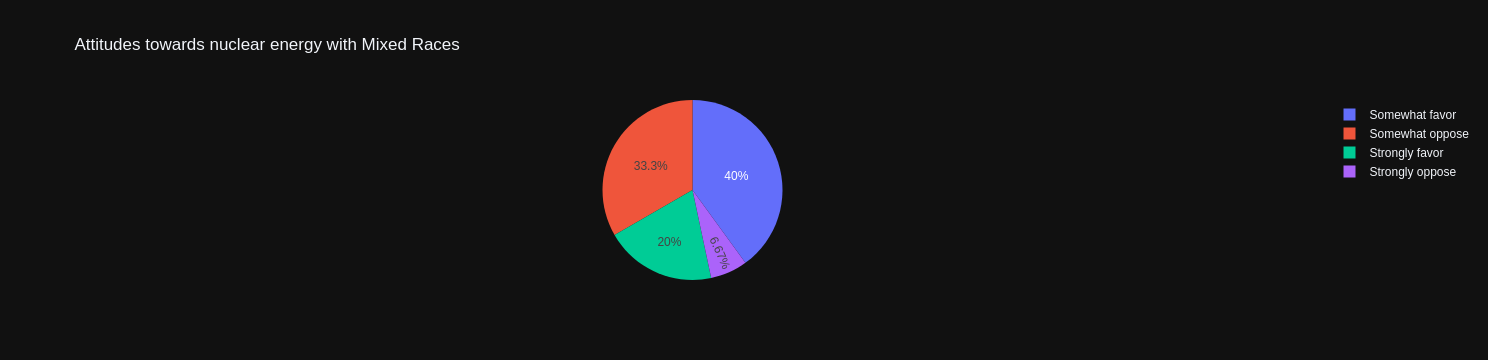

No answer
Strongly favor: 1
Somewhat favor: 0
Somewhat oppose: 0
Strongly oppose: 0


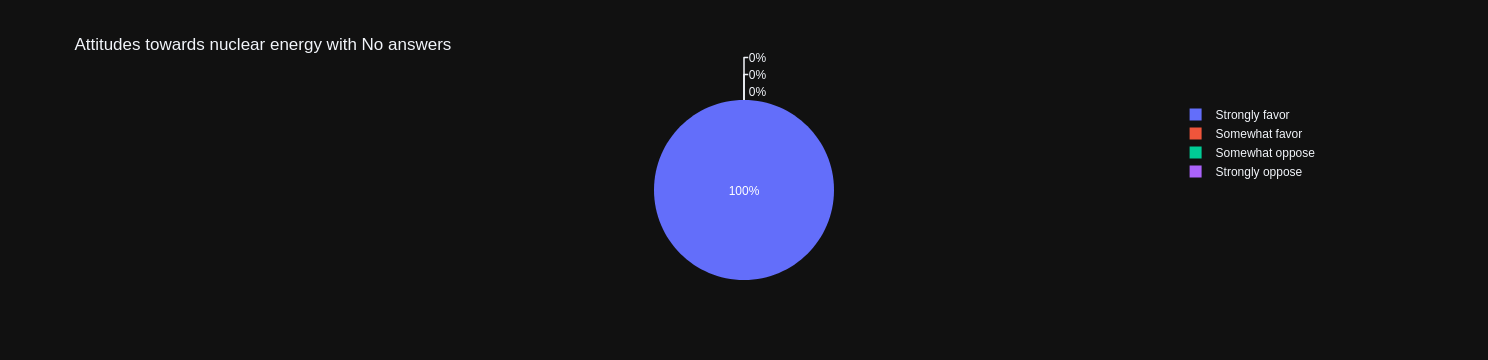

Other
Strongly favor: 0
Somewhat favor: 1
Somewhat oppose: 1
Strongly oppose: 1


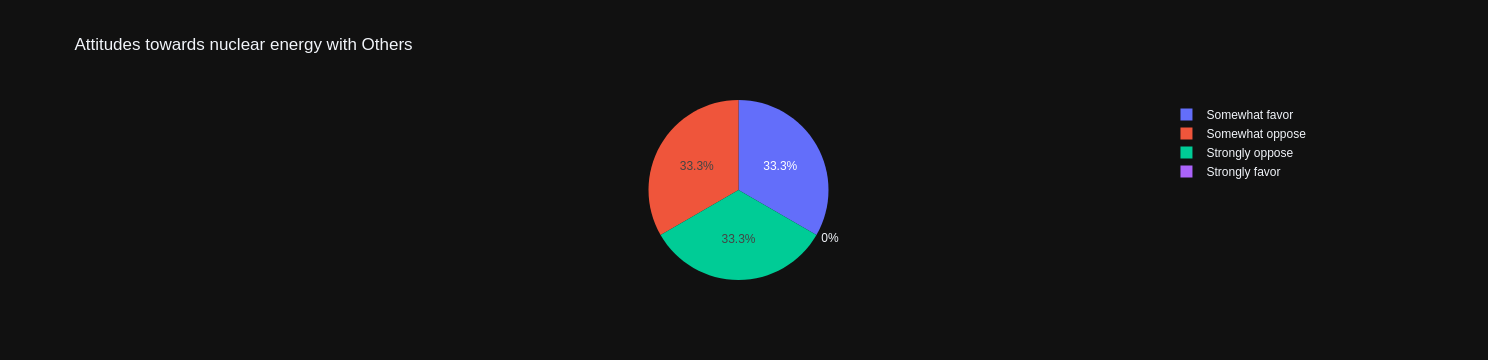

In [8]:
plot_bar_or_pie("Q3", "Attitudes towards nuclear energy with {key}s")

Moderate
Strongly favor: 100
Somewhat favor: 194
Somewhat oppose: 70
Strongly oppose: 30


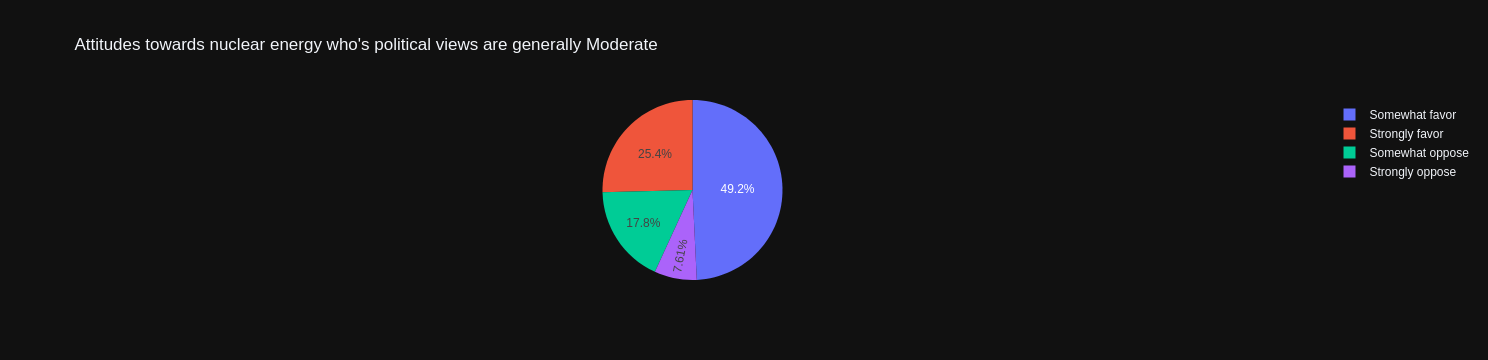

Very liberal
Strongly favor: 48
Somewhat favor: 33
Somewhat oppose: 18
Strongly oppose: 12


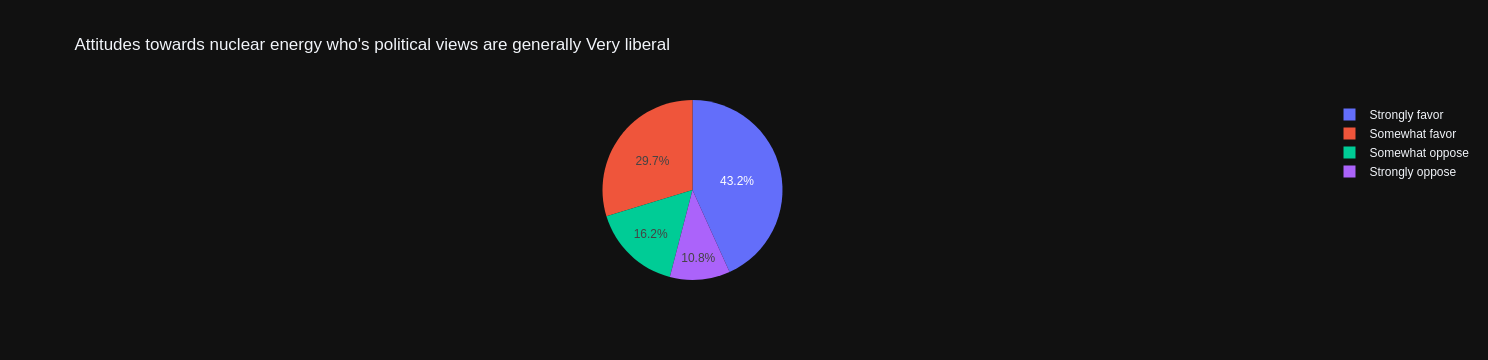

Somewhat conservative
Strongly favor: 68
Somewhat favor: 97
Somewhat oppose: 23
Strongly oppose: 7


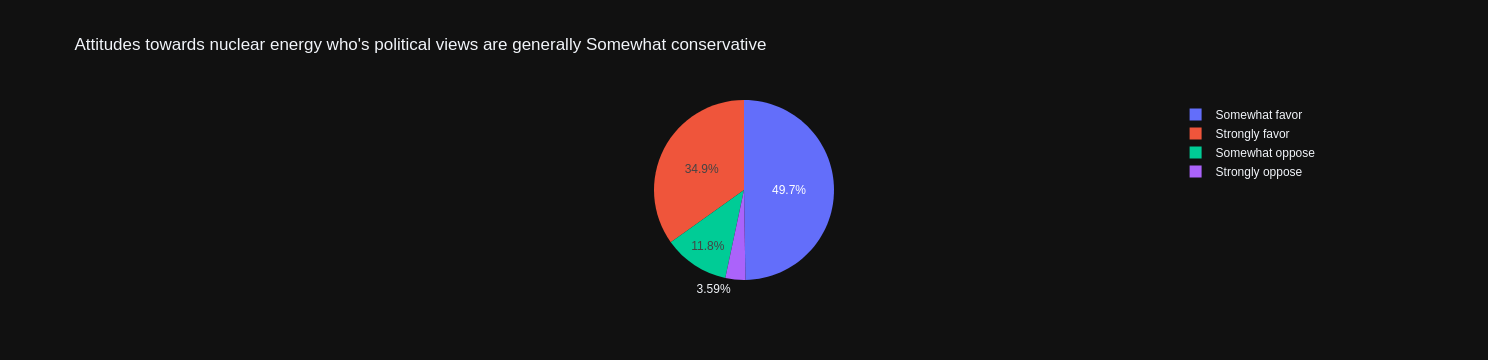

Very conservative
Strongly favor: 89
Somewhat favor: 43
Somewhat oppose: 19
Strongly oppose: 9


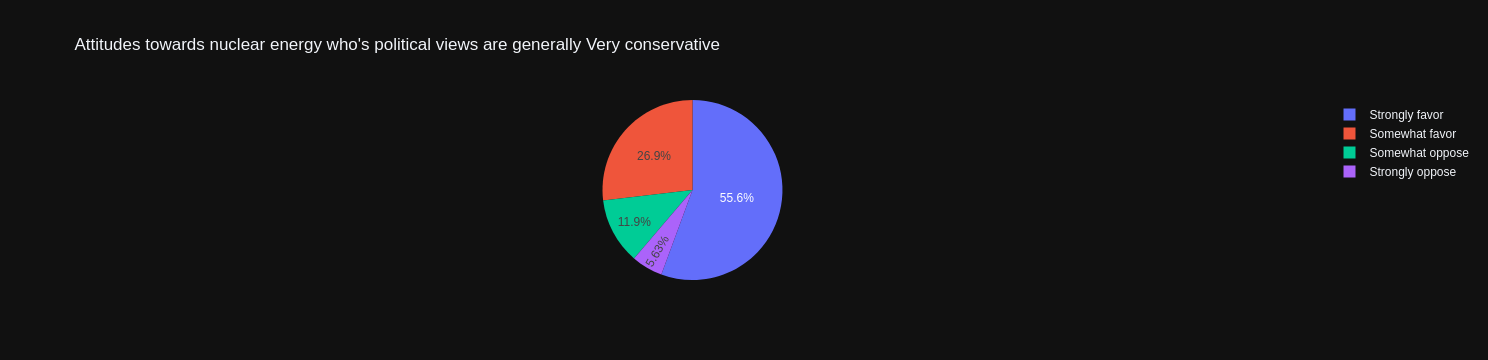

Somewhat liberal
Strongly favor: 25
Somewhat favor: 66
Somewhat oppose: 28
Strongly oppose: 14


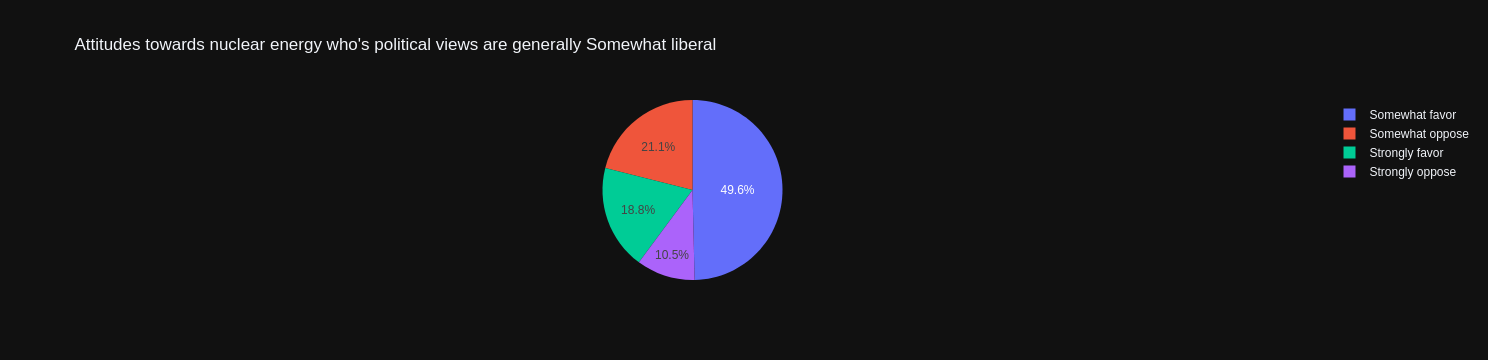

None of above
Strongly favor: 2
Somewhat favor: 4
Somewhat oppose: 1
Strongly oppose: 0


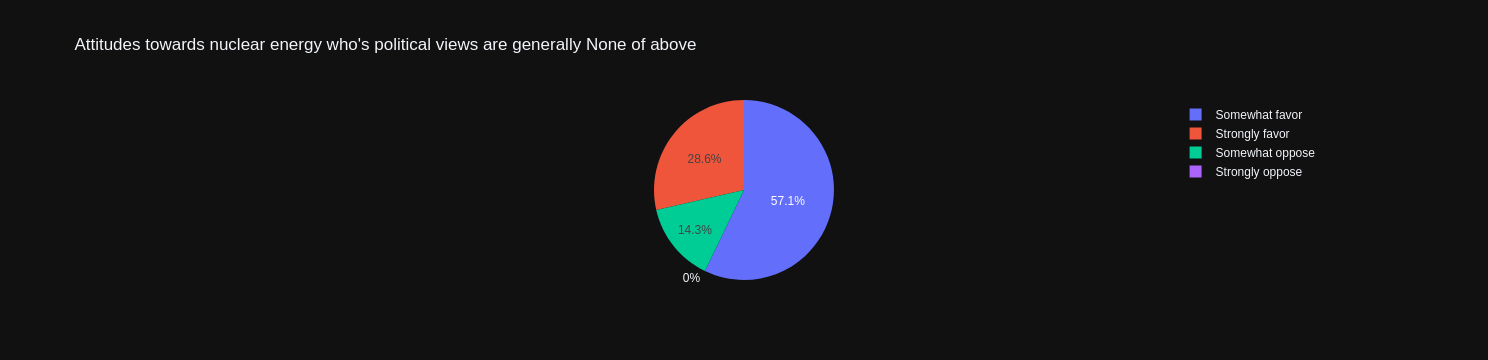

In [9]:
plot_bar_or_pie("Q5a", "Attitudes towards nuclear energy who's political views are generally {key}")

### Histograms

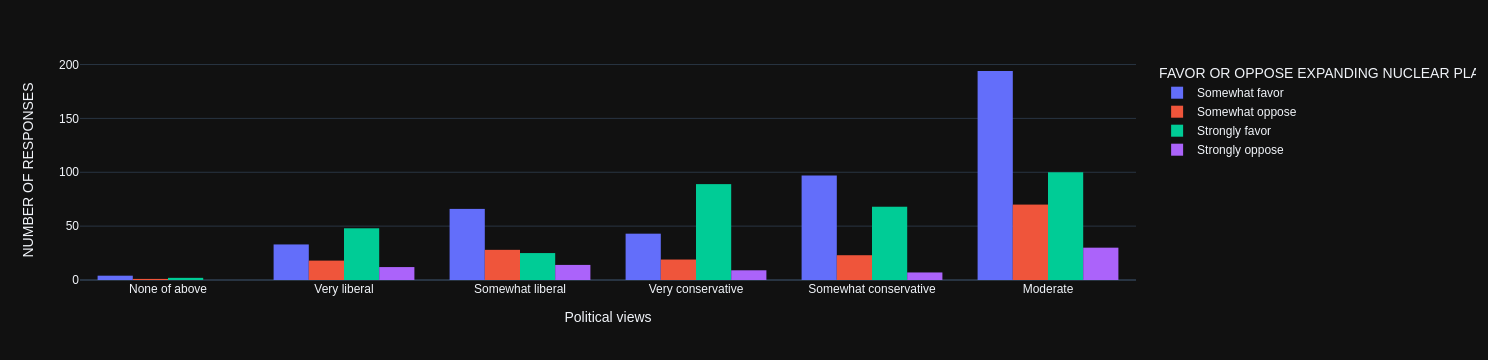

In [26]:
import plotly.express as px
fig = px.histogram(dataframe1, x="Q5a", color="Q10", template='plotly_dark', barmode="group").update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Political views", yaxis_title="NUMBER OF RESPONSES", legend_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS",
)
fig.show()

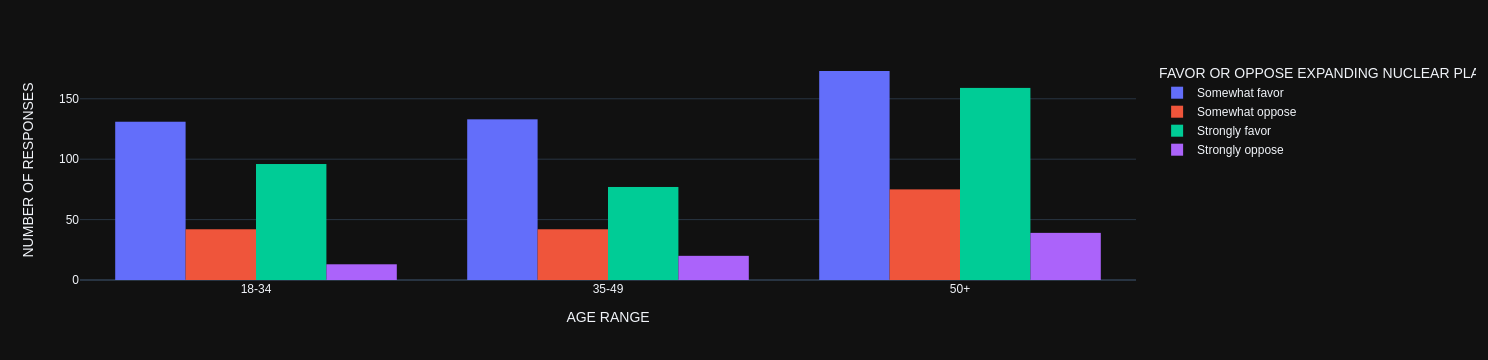

In [27]:
fig = px.histogram(dataframe1, x="hAge1", color="Q10", template='plotly_dark', barmode="group").update_layout(
xaxis_title="AGE RANGE", yaxis_title="NUMBER OF RESPONSES", legend_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS",
)
fig.show()

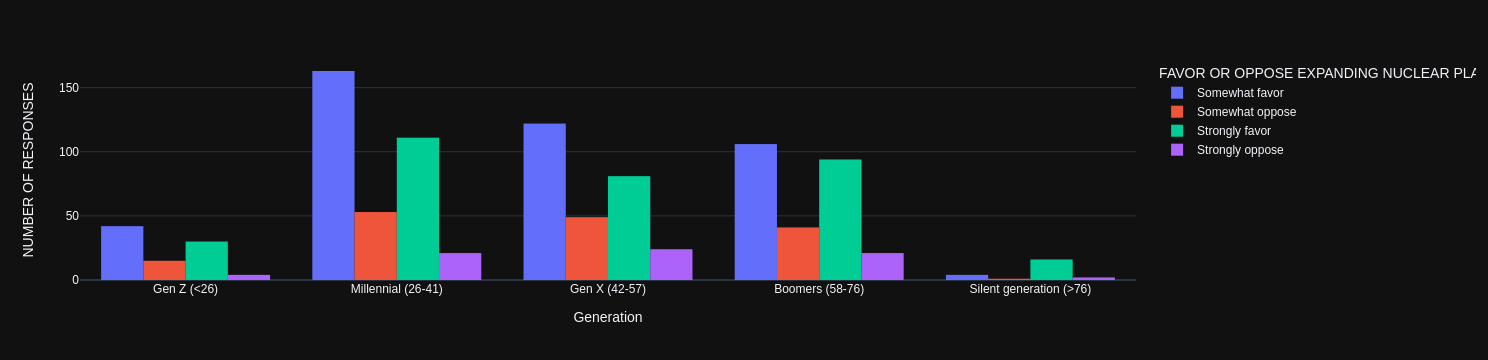

In [28]:
fig = px.histogram(dataframe1, x="hAge2", color="Q10", template='plotly_dark', barmode="group").update_layout(
xaxis_title="Generation", yaxis_title="NUMBER OF RESPONSES", legend_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS",
)
fig.show()

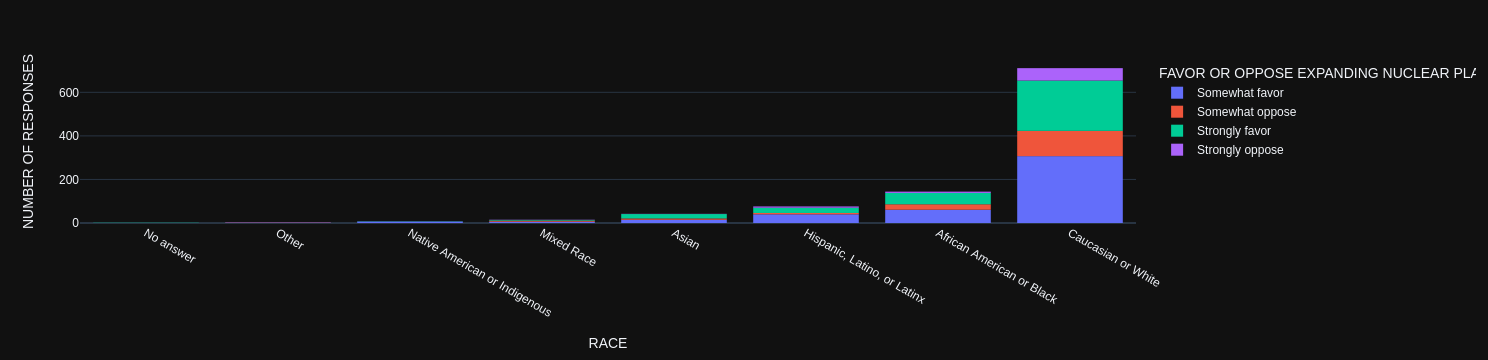

In [24]:
fig = px.histogram(dataframe1, x="Q3", color="Q10", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="RACE", yaxis_title="NUMBER OF RESPONSES", legend_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS",
)
fig.show()

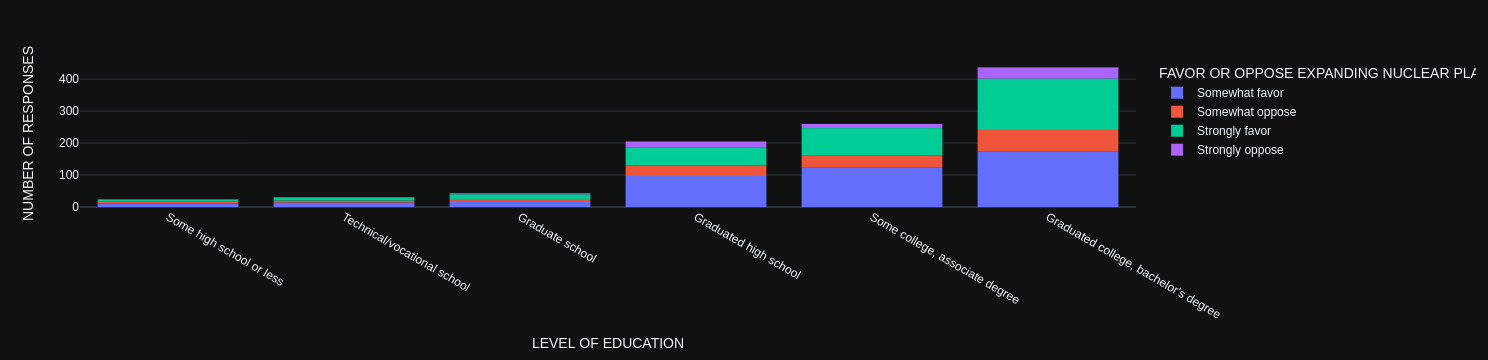

In [29]:
fig = px.histogram(dataframe1, x="Q4", color="Q10", template='plotly_dark').update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="LEVEL OF EDUCATION", yaxis_title="NUMBER OF RESPONSES", legend_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS",
)
fig.show()